Steps:
- Gradient boosting model: XGBoost/LightGBM
- SHAP values: show which features drive predictions
- 

Plots:

- Plot forecast vs actual vs entsoe forecast
- Error distribution plot
- Parity plot (scatter plot of actual vs forecast with 45 deg line)

- SHAPE Summary plot (beeswarm)
- SHAP bar plot (global importance)
- SHAP Force plot (local explanation)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
print(sys.executable)

sys.path.append(os.path.abspath("../src"))
from plotting_price_drivers import *
from merit_order import *
from gradient_boosting import *

/usr/local/bin/python3


In [7]:
filepath = '../data/clean/exploitable/merged_data.csv'
filepath_merit = '../data/clean/exploitable/merged_data_merit.csv'
df = pd.read_csv(filepath, parse_dates=['Date'])
df_merit_order = pd.read_csv(filepath_merit, parse_dates=['Date'])

In [8]:
df_lag = create_lag_features(df_merit_order)
df_lag = ensure_datetime_index(df_lag)
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_time2(df_lag, target_col='price_lag_24', train_size=0.9)

model = train_xgb(X_train, y_train, X_val, y_val)
y_pred, rmse, mae = evaluate_model(model, X_test,y_test)



print(len(y_pred))
print(len(y_test))

RMSE: 28.22
MAE: 22.16
3504
3504


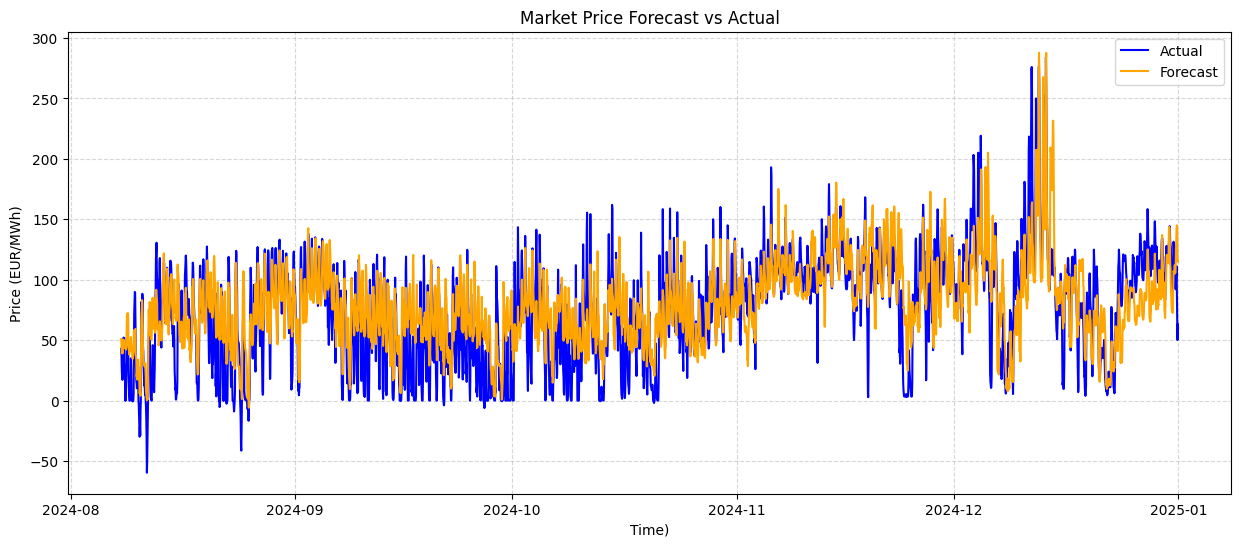

In [9]:
plot_forecast(df_lag, y_test, y_pred)
df_2023 = df_merit_order[df_merit_order['Date'].dt.year == 2023]

# Plot the price for 2023


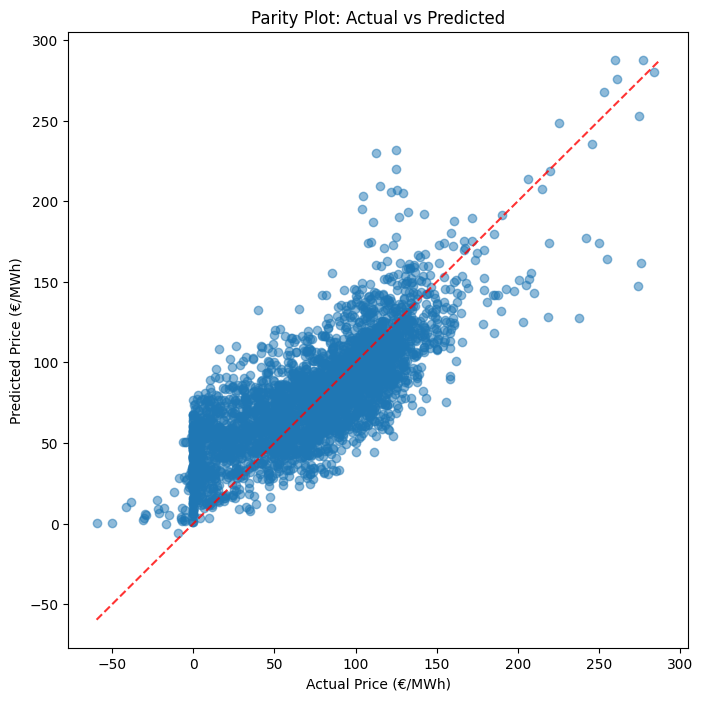

In [10]:
plot_parity(y_test, y_pred)